In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from common_functions import open_connection, translate_products
from sql_queries import ordered_product, product_reviews, sellers_sold_items, translation_table

#### **Basic Setup**

In [2]:
# Database file path location
DATABASE_FILE = "olist.db"
connection = open_connection(DATABASE_FILE)

Connection is successful


In [3]:
import textwrap


def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)    

### **Case 1: Analyzing products which are ordered the most**

#### **Loading data and show basic table information**

In [4]:
# Importing table from the database
df_ordered_products = pd.read_sql(ordered_product, connection)
df_ordered_products.head()

,order_id,product_name
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim


In [5]:
# Checking query information
print("Table shape:\n", df_ordered_products.shape)
print("\nTable information")
df_ordered_products.info()

Table shape:
 (112650, 2)

Table information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      112650 non-null  object
 1   product_name  111047 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


#### **Data Cleaning - Finding missing data**

In [6]:
# Checking null value
df_ordered_products.isna().sum()

order_id           0
product_name    1603
dtype: int64

In [7]:
df_ordered_products[df_ordered_products.isna().any(axis=1)]

,order_id,product_name
123,0046e1d57f4c07c8c92ab26be8c3dfc0,None
125,00482f2670787292280e0a8153d82467,None
132,004f5d8f238e8908e6864b874eda3391,None
142,0057199db02d1a5ef41bacbf41f8f63b,None
171,006cb7cafc99b29548d4f412c7f9f493,None
...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,None
112333,ff3024474be86400847879103757d1fd,None
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,None
112438,ff7b636282b98e0aa524264b295ed928,None


In [8]:
# Change the product Category to Unknown in Our Query
df_ordered_products["product_name"].fillna("Unknown", inplace=True)

# Re-Checking The Null Value
df_ordered_products.isnull().sum()

order_id        0
product_name    0
dtype: int64

#### **Data Cleaning - Finding Duplicates**

In [9]:
df_ordered_products[df_ordered_products.duplicated(keep=False)]

,order_id,product_name
13,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim
14,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim
32,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
33,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
34,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,informatica_acessorios
112640,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes
112641,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes
112642,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes


In [10]:
df_ordered_products[df_ordered_products.duplicated(keep=False)]

,order_id,product_name
13,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim
14,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim
32,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
33,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
34,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,informatica_acessorios
112640,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes
112641,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes
112642,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes


In [11]:
# Removing duplicates
df_ordered_products.drop_duplicates(keep="first", inplace=True)

# Re-check duplicates
df_ordered_products[df_ordered_products.duplicated()]

,order_id,product_name


In [ ]:
plt.yt

In [12]:
df_ordered_products.shape

(99470, 2)

### **Data Formatting and Manipulaton**

In [13]:
df_ordered_products.head()

,order_id,product_name
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim


In [14]:
## Create Translation Table with Pandas
df_translation_table = pd.read_sql(translation_table, connection)

## Get Translation Dictionary
new_product_name = translate_products(df_translation_table)
print(new_product_name)

{'beleza_saude': 'Health beauty', 'informatica_acessorios': 'Computers accessories', 'automotivo': 'Auto', 'cama_mesa_banho': 'Bed bath table', 'moveis_decoracao': 'Furniture decor', 'esporte_lazer': 'Sports leisure', 'perfumaria': 'Perfumery', 'utilidades_domesticas': 'Housewares', 'telefonia': 'Telephony', 'relogios_presentes': 'Watches gifts', 'alimentos_bebidas': 'Food drink', 'bebes': 'Baby', 'papelaria': 'Stationery', 'tablets_impressao_imagem': 'Tablets printing image', 'brinquedos': 'Toys', 'telefonia_fixa': 'Fixed telephony', 'ferramentas_jardim': 'Garden tools', 'fashion_bolsas_e_acessorios': 'Fashion bags accessories', 'eletroportateis': 'Small appliances', 'consoles_games': 'Consoles games', 'audio': 'Audio', 'fashion_calcados': 'Fashion shoes', 'cool_stuff': 'Cool stuff', 'malas_acessorios': 'Luggage accessories', 'climatizacao': 'Air conditioning', 'construcao_ferramentas_construcao': 'Construction tools construction', 'moveis_cozinha_area_de_servico_jantar_e_jardim': 'Ki

In [15]:
# Replacing the current product name with cleaned and translated data
df_ordered_products["product_name"].replace(new_product_name, inplace=True)

# Re-check the unformated data
unformatted_data = []
for product in df_ordered_products["product_name"].unique():
    if "_" in product:
        unformatted_data.append(product)

unformatted_data

['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer']

In [16]:
# Adding unformatted and not translated data
new_product_name["pc_gamer"] = "PC Gamer" 
new_product_name["portateis_cozinha_e_preparadores_de_alimentos"] = "Kitchen and Food Preparation racks"

# Replacing unformatted and not translated data
df_ordered_products["product_name"].replace(new_product_name, inplace=True)

# Re-checking the data
unformatted_data = []
for product in df_ordered_products["product_name"].unique():
    if "_" in product:
        unformatted_data.append(product)

unformatted_data

[]

#### **Group and Transform Data**

In [17]:
df_product_analysis = df_ordered_products.groupby("product_name").agg("count")

df_product_analysis.rename(columns={"order_id": "order_counts"}, inplace=True)
df_product_analysis.head()

,order_counts
product_name,
Agro industry and commerce,182
Air conditioning,253
Art,202
Arts and craftmanship,23
Audio,350


In [18]:
df_product_analysis.reset_index(inplace=True)
df_product_analysis

,product_name,order_counts
0,Agro industry and commerce,182
1,Air conditioning,253
2,Art,202
3,Arts and craftmanship,23
4,Audio,350
...,...,...
69,Tablets printing image,79
70,Telephony,4199
71,Toys,3886
72,Unknown,1451


### **Data Analysis**

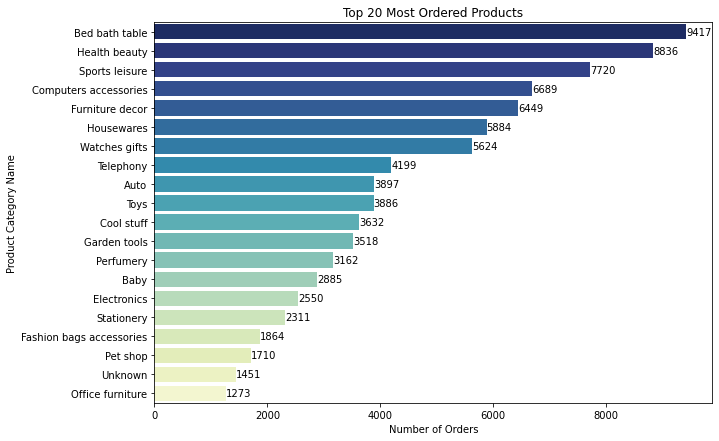

In [19]:
# Get Top 10 most ordered products
most_ordered_product = df_product_analysis.sort_values("order_counts", ascending=False)[:20]


# Create chart
plt.figure(figsize=(10, 7))

ax1 = sns.barplot(x="order_counts", y="product_name",
                  palette="YlGnBu_r", data=most_ordered_product)

# Adding data label into the graph
ax1.bar_label(ax1.containers[0])

# Adding table name and axes labels
plt.title("Top 20 Most Ordered Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product Category Name")
plt.show()

In [20]:
df_product_analysis.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_counts,74.0,1344.189189,2236.901175,2.0,76.0,246.0,1406.5,9417.0


### **Case 2: Analyzing products which are ordered the most**

#### **Loading data and show basic table information**

In [21]:
df_product_reviews = pd.read_sql(product_reviews, connection)
df_product_reviews.head()

,order_id,product_name,review_score
0,e17e4f88e31525f7deef66779844ddce,perfumaria,5.0
1,5236307716393b7114b53ee991f36956,artes,5.0
2,01f66e58769f84129811d43eefd187fb,esporte_lazer,5.0
3,143d00a4f2dde4e0364ee1821577adb3,bebes,1.0
4,86cafb8794cb99a9b1b77fc8e48fbbbb,utilidades_domesticas,5.0


In [22]:
print("Data Frame Shape: ", df_product_reviews.shape)
print("\nData Frame information")
df_product_reviews.info()

Data Frame Shape:  (113314, 3)

Data Frame information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      113314 non-null  object 
 1   product_name  111702 non-null  object 
 2   review_score  112372 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


#### **Data Cleaning - Finding missing data**

In [23]:
df_product_reviews.isnull().sum()

order_id           0
product_name    1612
review_score     942
dtype: int64

In [24]:
df_product_reviews["product_name"].fillna("Unknown", inplace=True)
df_product_reviews.isna().sum()

order_id          0
product_name      0
review_score    942
dtype: int64

In [25]:
df_review_table = pd.read_sql("SELECT review_id, review_score "
                              "FROM olist_order_reviews_dataset", connection)
df_review_table.isna().sum()

review_id       0
review_score    0
dtype: int64

In [26]:
df_order_table = pd.read_sql("SELECT order_id FROM olist_order_dataset", connection)
df_order_table.isna().sum()

order_id    0
dtype: int64

In [27]:
df_order_item_table = pd.read_sql("SELECT product_id, order_id "
                                  "FROM olist_order_items_dataset", connection)
df_order_item_table.isna().sum()

product_id    0
order_id      0
dtype: int64

In [28]:
cte_query = """
SELECT
	order_items.product_id,
	order_data.order_id,
	reviews.review_id,
	reviews.review_score,
	order_data.order_status
FROM olist_order_dataset AS order_data
LEFT JOIN olist_order_reviews_dataset AS reviews ON order_data.order_id = reviews.order_id
LEFT JOIN olist_order_items_dataset AS order_items ON order_data.order_id = order_items.order_id
"""
df_cte_table = pd.read_sql(cte_query, connection)
df_cte_table.isna().sum()

product_id      778
order_id          0
review_id       961
review_score    961
order_status      0
dtype: int64

In [29]:
df_product_reviews.dropna(subset=["review_score"], inplace=True)
df_product_reviews.isna().sum()

order_id        0
product_name    0
review_score    0
dtype: int64

#### **Data Cleaning - Finding Duplicates**

In [30]:
df_product_reviews[df_product_reviews.duplicated(keep=False)]

,order_id,product_name,review_score
8,6ecf7023e8dd4ec8b08746c35b9fcb60,moveis_decoracao,2.0
9,6ecf7023e8dd4ec8b08746c35b9fcb60,moveis_decoracao,2.0
10,8ac5b235603eee2e21e36261b2df536c,moveis_decoracao,2.0
11,8ac5b235603eee2e21e36261b2df536c,moveis_decoracao,2.0
12,c5874d438cf199ea7c0f27967f6cf462,moveis_decoracao,1.0
...,...,...,...
113308,59e88b7d3675e89aceaf86f372d3bc9a,informatica_acessorios,4.0
113309,59e88b7d3675e89aceaf86f372d3bc9a,informatica_acessorios,4.0
113310,6e4465d771f02e4fe335225de3c6c043,informatica_acessorios,5.0
113311,6e4465d771f02e4fe335225de3c6c043,informatica_acessorios,5.0


In [31]:
df_product_reviews.drop_duplicates(keep="first", inplace=True)

#Re-Check duplicates
df_product_reviews[df_product_reviews.duplicated()]

,order_id,product_name,review_score


#### **Data Formatting and Manipulaton**

In [32]:
df_product_reviews.replace(new_product_name, inplace=True)
df_product_reviews["product_name"].head()

0         Perfumery
1               Art
2    Sports leisure
3              Baby
4        Housewares
Name: product_name, dtype: object

In [33]:
df_product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98924 entries, 0 to 113313
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      98924 non-null  object 
 1   product_name  98924 non-null  object 
 2   review_score  98924 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


In [34]:
df_product_reviews = df_product_reviews.astype({"review_score": "int64"})
df_product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98924 entries, 0 to 113313
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      98924 non-null  object
 1   product_name  98924 non-null  object
 2   review_score  98924 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


#### **Group and Transform Data**

In [35]:
df_review_proportion = df_product_reviews.groupby("review_score").agg("count")
df_review_proportion.head()

,order_id,product_name
review_score,,
1,11117,11117
2,3168,3168
3,8200,8200
4,19159,19159
5,57280,57280


In [36]:
df_review_proportion.reset_index(inplace=True)
df_review_proportion.head()

,review_score,order_id,product_name
0,1,11117,11117
1,2,3168,3168
2,3,8200,8200
3,4,19159,19159
4,5,57280,57280


In [37]:
df_review_by_product = df_product_reviews.groupby(["review_score", "product_name"]).agg("count")
df_review_by_product.head()

order_id
review_score product_name                        
1            Agro industry and commerce        21
             Air conditioning                  34
             Art                               25
             Arts and craftmanship              3
             Audio                             58

In [38]:
df_review_by_product.reset_index(inplace=True)
df_review_by_product.head()

,review_score,product_name,order_id
0,1,Agro industry and commerce,21
1,1,Air conditioning,34
2,1,Art,25
3,1,Arts and craftmanship,3
4,1,Audio,58


### **Data Analysis**

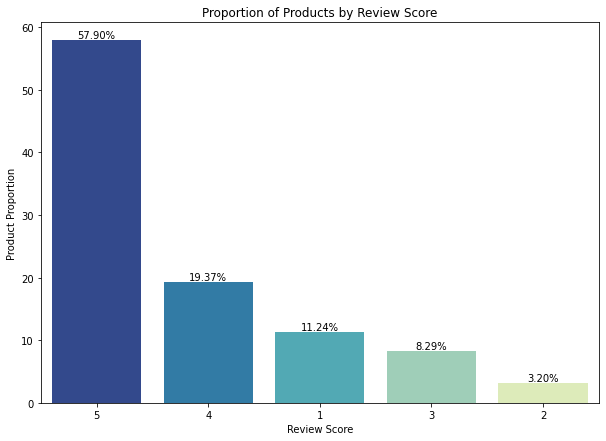

In [39]:
# Set percentage column on the data frame

percentages = (df_review_proportion["product_name"]\
              / df_review_proportion["product_name"].sum())\
              * 100

df_review_proportion["percentages"] = percentages

# Create chart
plt.figure(figsize=(10, 7))

ax2 = sns.barplot(x="review_score", 
                  y="percentages",
                  palette="YlGnBu_r", 
                  data=df_review_proportion,
                  order=df_review_proportion
                        .sort_values("percentages", 
                                      ascending=False).review_score)

# Adding data label into the graph
ax2.bar_label(ax2.containers[0], fmt="%.2f%%")

# Adding table name and axes labels
plt.title("Proportion of Products by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Product Proportion")
plt.show()

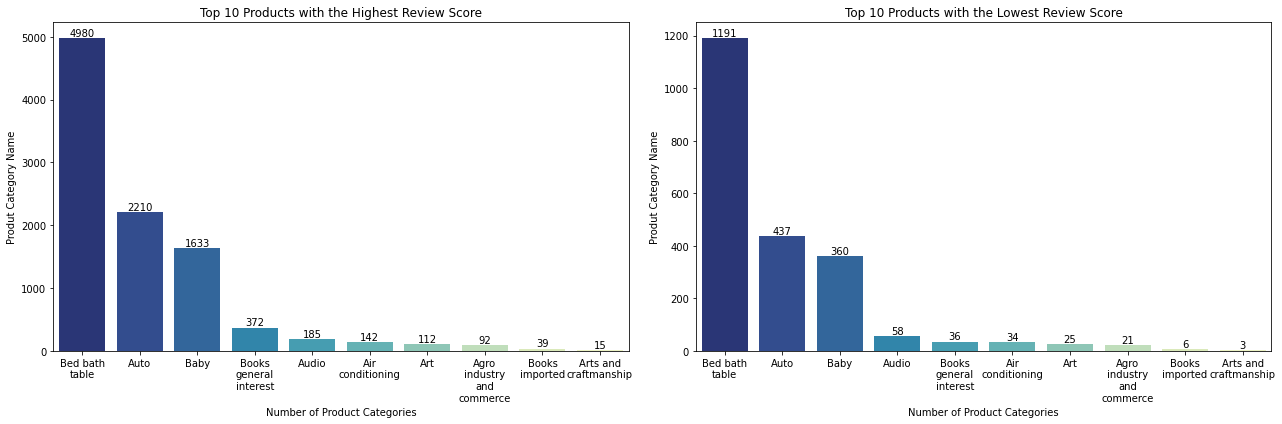

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i, _ in enumerate(axes):
      if i == 0:
            data = df_review_by_product[df_review_by_product["review_score"] == 5][:10]
            bar_title = "Top 10 Products with the Highest Review Score"
      elif i == 1:
            data = df_review_by_product[df_review_by_product["review_score"] == 1][:10]
            bar_title = "Top 10 Products with the Lowest Review Score"
      
      bar_plot = sns.barplot(x="product_name",
                             y="order_id",
                             ax=axes[i],
                             palette="YlGnBu_r",
                             data=data,
                             order=data.sort_values("order_id", 
                                                    ascending=False).product_name)

      wrap_labels(axes[i], 10)
      axes[i].bar_label(axes[i].containers[0])
      axes[i].title.set_text(bar_title)
      axes[i].set_xlabel("Number of Product Categories")
      axes[i].set_ylabel("Produt Category Name")

plt.tight_layout()


### **Case 3: Analyzing products ordered by sellers**

#### **Loading data and show basic table information**

In [41]:
df_sellers_products = pd.read_sql(sellers_sold_items, connection)
df_sellers_products.head()

,order_id,product_name,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,perfumaria,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim,df560393f3a51e74553ab94004ba5c87


In [42]:
print("Data Frame Shape: ", df_sellers_products.shape)
print("\nData Frame information")
df_sellers_products.info()

Data Frame Shape:  (112650, 3)

Data Frame information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      112650 non-null  object
 1   product_name  111047 non-null  object
 2   seller_id     112650 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [43]:
df_sellers_products.isnull().sum()

order_id           0
product_name    1603
seller_id          0
dtype: int64

#### **Data Cleaning - Finding missing data**

In [44]:
df_sellers_products.isnull().sum()

order_id           0
product_name    1603
seller_id          0
dtype: int64

In [45]:
df_sellers_products[df_sellers_products["product_name"].isnull()]

,order_id,product_name,seller_id
123,0046e1d57f4c07c8c92ab26be8c3dfc0,None,38e6dada03429a47197d5d584d793b41
125,00482f2670787292280e0a8153d82467,None,702835e4b785b67a084280efca355756
132,004f5d8f238e8908e6864b874eda3391,None,c826c40d7b19f62a09e2d7c5e7295ee2
142,0057199db02d1a5ef41bacbf41f8f63b,None,e5a3438891c0bfdb9394643f95273d8e
171,006cb7cafc99b29548d4f412c7f9f493,None,323ce52b5b81df2cd804b017b7f09aa7
...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,None,c826c40d7b19f62a09e2d7c5e7295ee2
112333,ff3024474be86400847879103757d1fd,None,3771c85bac139d2344864ede5d9341e3
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,None,07017df32dc5f2f1d2801e579548d620
112438,ff7b636282b98e0aa524264b295ed928,None,6cd68b3ed6d59aaa9fece558ad360c0a


In [46]:
df_sellers_products["product_name"].fillna("Unknown", inplace=True)

# Re-Checking missing values
df_sellers_products.isna().sum()

order_id        0
product_name    0
seller_id       0
dtype: int64

#### **Data Cleaning - Finding Duplicates**

In [47]:
df_sellers_products[df_sellers_products.duplicated(keep=False)]

,order_id,product_name,seller_id
13,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim,1f50f920176fa81dab994f9023523100
14,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim,1f50f920176fa81dab994f9023523100
32,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer,a17f621c590ea0fab3d5d883e1630ec6
33,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer,a17f621c590ea0fab3d5d883e1630ec6
34,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer,a17f621c590ea0fab3d5d883e1630ec6
...,...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,informatica_acessorios,4e922959ae960d389249c378d1c939f5
112640,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes,b1fc4f64df5a0e8b6913ab38803c57a9
112641,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes,b1fc4f64df5a0e8b6913ab38803c57a9
112642,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes,b1fc4f64df5a0e8b6913ab38803c57a9


In [48]:
df_sellers_products.drop_duplicates(keep="first", inplace=True)

# Re-checking duplcates
df_sellers_products[df_sellers_products.duplicated()]

,order_id,product_name,seller_id


In [49]:
df_sellers_products.shape

(100213, 3)

#### **Data Formatting and Manipulaton**

In [50]:
df_sellers_products.replace(new_product_name, inplace=True)
df_sellers_products["product_name"].head()

0         Cool stuff
1           Pet shop
2    Furniture decor
3          Perfumery
4       Garden tools
Name: product_name, dtype: object

In [51]:
df_sellers_products.head()

,order_id,product_name,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,Cool stuff,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,Pet shop,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,Furniture decor,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,Perfumery,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,Garden tools,df560393f3a51e74553ab94004ba5c87


In [60]:
sellers_name = df_sellers_products["seller_id"].unique()
new_sellers_name = [f"seller {i}" for i, _ in enumerate(sellers_name)]

new_sellers_id = dict(zip(sellers_name, new_sellers_name))
# print(new_sellers_id)

df_sellers_products["seller_id"].replace(new_sellers_id, inplace=True)

df_sellers_products.head()

,order_id,product_name,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,Cool stuff,seller 0
1,00018f77f2f0320c557190d7a144bdd3,Pet shop,seller 1
2,000229ec398224ef6ca0657da4fc703e,Furniture decor,seller 2
3,00024acbcdf0a6daa1e931b038114c75,Perfumery,seller 3
4,00042b26cf59d7ce69dfabb4e55b4fd9,Garden tools,seller 4


#### **Group and Transform Data**

In [53]:
# df_sellers_analysis = df_sellers_products.groupby("product_name").agg("count")
# df_sellers_analysis.head()

In [54]:
# df_sellers_analysis.reset_index(inplace=True)
# df_sellers_analysis.head()

In [55]:
df_sellers_analysis = df_sellers_products.groupby(["seller_id"]).agg("count")
df_sellers_analysis

,order_id,product_name
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,3,3
001cca7ae9ae17fb1caed9dfb1094831,200,200
001e6ad469a905060d959994f1b41e4f,1,1
002100f778ceb8431b7a1020ff7ab48f,51,51
003554e2dce176b5555353e4f3555ac8,1,1
...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,1
ffdd9f82b9a447f6f8d4b91554cc7dd3,18,18
ffeee66ac5d5a62fe688b9d26f83f534,14,14


### **Data Analysis**

In [56]:
sellers_products = df_sellers_analysis.sort_values("seller_id", ascending=False)[:20]


# Create chart
plt.figure(figsize=(10, 7))

ax1 = sns.barplot(x="seller_id", y="product_name",
                  palette="YlGnBu_r", data=sellers_products)

# Adding data label into the graph
ax1.bar_label(ax1.containers[0])

# Adding table name and axes labels
plt.title("Top 20 Most Ordered Product Categories By Sellers")
plt.xlabel("Number of Sellers")
plt.ylabel("Product Category Name")
plt.show()

ValueError: Could not interpret input 'seller_id'

<Figure size 720x504 with 0 Axes>

In [ ]:
df_sellers_analysis.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_id,74.0,1354.22973,2259.470144,2.0,76.0,246.5,1407.0,9627.0
seller_id,74.0,1354.22973,2259.470144,2.0,76.0,246.5,1407.0,9627.0
